# K-means Clustering

The data set contains details of football players. The player Song is injured and coach wants to have appropriate replacement of Song. We need to find appropriate segment from which the coach can replace the injured player.

**The aim is to group similar type of players together using K-means clustering algorithm, find out to which gorup the player 'song' belongs to and find out the best possible replacement to him**. 

In [1]:
#Load the required libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir='C:\\Users\\Ajay\\Documents\\Clustering'

In [3]:
os.chdir(data_dir)

In [4]:
data=pd.read_csv("SongFootball.csv",encoding='latin-1')

**Understanding and Preparing the data**

In [5]:
print(data.shape)
print(data.head())

(480, 10)
   Player Id  Tackles  wontackles  duels  wonduels  passes  wonpasses  \
0          3       28    0.642857    170  0.394118    1108   0.753610   
1        363       39    0.641026    107  0.532710    1137   0.930519   
2        973       32    0.656250    104  0.625000     297   0.713805   
3       1059       28    0.785714    135  0.577778     424   0.738208   
4       1131       12    0.916667     58  0.620690     232   0.780172   

   interception First_Name Last_Name  
0            30      Giggs      Ryan  
1            24    Scholes      Paul  
2            23   Woodgate  Jonathan  
3            32   Gabbidon    Daniel  
4            14    Bramble     Titus  



There are 480 players in the data set and 10 attributes describing each player


In [6]:
data.columns

Index(['Player Id', 'Tackles', 'wontackles', 'duels', 'wonduels', 'passes',
       'wonpasses', 'interception', 'First_Name', 'Last_Name'],
      dtype='object')

Lets see details of the player `Song`

In [7]:
data[data['First_Name']=="Song"]

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name
263,21091,100,0.73,396,0.474747,2261,0.839894,66,Song,Alexandre



We can remove columns 1,9 and 10 (Player Id,First_Name,Last_Name), they are irrelevant for the model


In [14]:
data1=data.copy()
data1.head()

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name
0,3,28,0.642857,170,0.394118,1108,0.753610,30,Giggs,Ryan
1,363,39,0.641026,107,0.532710,1137,0.930519,24,Scholes,Paul
2,973,32,0.656250,104,0.625000,297,0.713805,23,Woodgate,Jonathan
3,1059,28,0.785714,135,0.577778,424,0.738208,32,Gabbidon,Daniel
4,1131,12,0.916667,58,0.620690,232,0.780172,14,Bramble,Titus


In [15]:
data1.drop(data1.columns[[0,8,9]],axis=1, inplace = True)

To build a model using K-means algorithm, data should only have numeric/integer variables. 
Checking if all other variables are numeric or not, as we can only use numerical variables for clustering

In [17]:
data1.dtypes

Tackles           int64
wontackles      float64
duels             int64
wonduels        float64
passes            int64
wonpasses       float64
interception      int64
dtype: object


Checking for missing values in each columns


In [19]:
data1.isnull().sum() 

Tackles         0
wontackles      0
duels           0
wonduels        0
passes          0
wonpasses       0
interception    0
dtype: int64

For clustering algorithm, the data should be on same scale.

**Scaling the data using `sklearn`**

In [20]:
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(data1,axis=0)

In [21]:
print (dat_scaled)
print ("Type of output is "+str(type(dat_scaled)))
print ("Shape of the object is "+str(dat_scaled.shape))

[[-0.07161472 -0.55356335  0.19231802 ...  0.72211922 -0.0331406
   0.20763391]
 [ 0.36102342 -0.56411628 -0.36985665 ...  0.7741784   1.87028208
  -0.05452552]
 [ 0.08570824 -0.47639505 -0.39662688 ... -0.73374278 -0.46142054
  -0.09821876]
 ...
 [-0.81889878  0.22383583 -1.07480585 ... -1.09815706 -3.10520237
  -0.88469705]
 [-1.01555248 -1.37669189 -1.253274   ... -1.21663658  0.69654158
  -1.10316324]
 [-1.05488322 -0.41637526 -1.23542719 ... -1.2417686   1.08080388
  -1.05947   ]]
Type of output is <class 'numpy.ndarray'>
Shape of the object is (480, 7)



Now the data is ready to build K-means model


In [22]:
#importing cluster library from sklearn
import sklearn.cluster as cluster

**Initially I will build a model using K (no.of clusters) as 5**

In [23]:
#Lets choose number of clusters as 5
kmeans=cluster.KMeans(n_clusters=5,init="k-means++")
kmeans=kmeans.fit(dat_scaled)

In [24]:
kmeans.cluster_centers_ #cluster center for each variable at each cluster

array([[-1.09190039, -3.72099426, -1.16771427,  0.82884216, -0.51008892,
        -1.24642171, -0.98236428],
       [-0.64313954, -0.04275059, -0.84767724,  0.55564303, -0.70255215,
         0.56243306, -0.6204895 ],
       [ 1.65229758,  0.04346425,  1.14005344,  0.36754364,  1.5333146 ,
         0.55149905,  1.65234799],
       [ 0.35696347,  0.05481596,  0.56623759, -0.05999956,  0.32848462,
        -0.05706292,  0.31362525],
       [-0.79293285,  0.5522889 , -0.45822438, -1.01178207, -0.68332188,
        -0.81964016, -0.77397923]])

**Now let's find out the optimal no.of cluster (K vlaue) for this data set**

**Within Sum of Squares or WSS** - measure the compactness of the cluster. Ideally WSS should be lower
The idea is to build 20 clustering models with no.of clusters varying from 1-20 and find out average WSS for each cluster

In [25]:
from scipy.spatial.distance import cdist
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(sum(np.min(cdist(dat_scaled, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / dat_scaled.shape[0])

Let's plot **K vs WSS** 

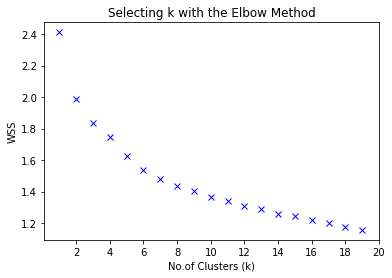

In [26]:
plt.plot(K, wss, 'bx')
plt.xlabel('No.of Clusters (k)')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
positions = (2,4,6,8,10,12,14,16,18,20)
plt.xticks(positions)
plt.show()

From the above plot (k vs WSS), we can see that after the point 12 (k) the line flattens out a bit

But it's very unclear to choose a number for k from the above plot

**Silhoutte score** can help us in choosing a number for k. **Silhouttte score is a measure used to calculate the notions of clusters being far apart (seperation) and compact (cohesion)**

![Silhoutte score](https://github.com/AjayprathapCh/K-Means-Clustering/blob/master/Silhoutte%20Measure.PNG)

First, find out Silhoutte score for K = 12

In [31]:
#With 12 clusters
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=12,random_state=200).fit(dat_scaled).labels_

In [28]:
metrics.silhouette_score(dat_scaled,labels,metric="euclidean",sample_size=100,random_state=200)

0.17235050498119495

Lets do build a grid search to see if we can achieve a better silhouette score at a different K value. 

In [30]:

for i in range(5,15):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

Silhoutte score for k= 5 is 0.22006784997177709
Silhoutte score for k= 6 is 0.22149855528574197
Silhoutte score for k= 7 is 0.21817863708669816
Silhoutte score for k= 8 is 0.19690149515507324
Silhoutte score for k= 9 is 0.19354855917623137
Silhoutte score for k= 10 is 0.17948804714965066
Silhoutte score for k= 11 is 0.2009046819510943
Silhoutte score for k= 12 is 0.19887057584225984
Silhoutte score for k= 13 is 0.19292880930822723
Silhoutte score for k= 14 is 0.19060973198317396


From above we can observe that at k=6 the model is getting the highest Silhoutte score and as K increases the Silhoutte score is decreasing constantly. The higher the the Silhoutte score the better the model

Hence, for the given data we can conclude 6 clusters would be good

We can use cluster profiling to check the heterogeneity between clusters

In [32]:
import cluster_profiles as cluster_profiles

In [33]:
kmeans=cluster.KMeans(n_clusters=6,random_state=200).fit(dat_scaled)

In [34]:
cluster_profiles.get_zprofiles(data=data1.copy(),kmeans=kmeans)
#The below cluster profile shows that each cluster is separated failry enough

,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,Size
Labels,,,,,,,,
0,-0.140297,0.006249,1.011658,-0.784412,0.133263,-0.614295,-0.249792,80
1,-0.919455,0.826305,-0.803733,-0.996005,-0.835558,-0.814194,-0.889084,74
2,-0.663785,-0.087181,-0.861062,0.523120,-0.757393,0.527781,-0.666968,122
3,1.740279,0.022955,1.244364,0.275218,1.621052,0.516951,1.639062,70
4,0.473522,0.077953,0.128435,0.336161,0.318670,0.241358,0.577683,118
5,-1.090618,-3.863482,-1.166727,0.856530,-0.469031,-1.228881,-0.984710,16


In [35]:
kmeans.labels_ #Final cluster label for each observation in the data with k=6

array([0, 4, 2, 4, 2, 1, 0, 4, 0, 4, 4, 2, 1, 3, 4, 4, 1, 5, 3, 2, 0, 2,
       3, 4, 0, 2, 3, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 5, 4, 4, 3, 1, 3,
       2, 2, 0, 1, 1, 0, 4, 4, 0, 0, 0, 4, 0, 3, 2, 3, 2, 0, 2, 0, 1, 1,
       0, 4, 0, 2, 2, 4, 1, 1, 0, 4, 4, 1, 2, 1, 2, 2, 2, 4, 4, 4, 0, 4,
       2, 0, 3, 2, 4, 4, 0, 4, 1, 2, 1, 4, 3, 4, 4, 1, 2, 4, 0, 0, 0, 2,
       4, 3, 0, 2, 2, 3, 4, 4, 1, 4, 0, 2, 4, 4, 4, 0, 0, 4, 1, 2, 2, 2,
       3, 4, 5, 0, 4, 0, 1, 0, 2, 3, 2, 2, 4, 3, 1, 2, 0, 2, 0, 2, 1, 3,
       3, 4, 4, 2, 2, 2, 4, 4, 1, 3, 4, 4, 2, 4, 3, 3, 2, 0, 3, 2, 2, 2,
       4, 3, 0, 4, 0, 4, 3, 4, 4, 4, 2, 4, 4, 3, 2, 4, 3, 0, 4, 1, 1, 2,
       3, 3, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 4, 4, 4, 0, 4, 4, 3, 2, 4, 4,
       3, 2, 4, 0, 1, 5, 4, 1, 4, 4, 2, 1, 4, 1, 1, 0, 0, 2, 1, 4, 3, 2,
       4, 2, 1, 4, 3, 3, 2, 2, 0, 0, 0, 5, 4, 4, 4, 2, 4, 3, 3, 3, 3, 3,
       4, 3, 3, 0, 2, 3, 2, 1, 0, 4, 0, 2, 2, 2, 3, 4, 1, 4, 3, 3, 4, 5,
       4, 4, 1, 0, 5, 4, 1, 4, 3, 5, 0, 3, 2, 0, 1,

Now we have cluster label for each observation. Let's assign cluster lables to the original observations

In [45]:
#Adding cluster Label to original data
data['Cluster_Label']=kmeans.labels_ 
data.head()

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name,Cluster_Label
0,3,28,0.642857,170,0.394118,1108,0.753610,30,Giggs,Ryan,0
1,363,39,0.641026,107,0.532710,1137,0.930519,24,Scholes,Paul,4
2,973,32,0.656250,104,0.625000,297,0.713805,23,Woodgate,Jonathan,2
3,1059,28,0.785714,135,0.577778,424,0.738208,32,Gabbidon,Daniel,4
4,1131,12,0.916667,58,0.620690,232,0.780172,14,Bramble,Titus,2


Now, let's check which cluster `Song` belongs to.

In [46]:

data[data['First_Name']=="Song"]

#Player 'Song' belongs to cluster 3

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name,Cluster_Label
263,21091,100,0.73,396,0.474747,2261,0.839894,66,Song,Alexandre,3


**Visualizing clusters**

Let's create plot Tackles vs Passes and label the data points with Cluster Label

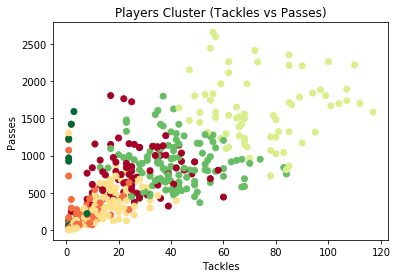

In [42]:
plt.scatter(data['Tackles'], data['passes'],c=data['Cluster_Label'],cmap=plt.cm.RdYlGn)
plt.xlabel('Tackles')
plt.ylabel('Passes')
plt.title('Players Cluster (Tackles vs Passes)')
plt.show()

Now lets find out which player can replace 'Song' with the help of Clusters. The idea is to find out a player with similar set of attributes from cluster 3.

From cluster profiling output we know that there are 70 players in cluster 3

In [48]:


print("Out of 70 players in cluster 3, the below 15 players have same level of skill set as Song")
similar_players=data[(data['Cluster_Label']==3) & (data['wontackles']>=0.73) & (data['wonpasses']>=0.83) & (data['wonpasses']>=0.47)]
similar_players

Out of 70 players in cluster 3, the below 15 players have same level of skill set as Song


,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name,Cluster_Label
90,7933,68,0.735294,238,0.554622,1230,0.838211,70,Coloccini,Fabricio,3
100,8758,72,0.819444,293,0.563140,2413,0.876917,56,Arteta,Mikel,3
111,10561,51,0.784314,187,0.561497,1444,0.856648,60,Henry,Karl,3
153,14664,55,0.818182,259,0.536680,2441,0.897583,39,Yaya Touré,0,3
154,14668,86,0.732558,324,0.490741,1684,0.833729,81,Reo-Coker,Nigel,3
169,15284,53,0.773585,247,0.655870,1818,0.842134,79,Hangeland,Brede,3
177,15943,47,0.829787,216,0.606481,1471,0.851122,67,Vermaelen,Thomas,3
192,17476,65,0.784615,176,0.670455,1651,0.863113,73,Kompany,Vincent,3
220,19159,57,0.754386,243,0.547325,2595,0.852408,83,Williams,Ashley,3
263,21091,100,0.730000,396,0.474747,2261,0.839894,66,Song,Alexandre,3


Let's refine the bove list further to narrow down no.of players to replace 'Song'

In [51]:
similar_players[(similar_players['Tackles']>100)]

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name,Cluster_Label
323,39104,112,0.758929,478,0.577406,1702,0.877203,33,Dembélé,Moussa,3
332,39895,101,0.782178,376,0.505319,1667,0.838032,101,Mulumbu,Youssuf,3
341,40555,110,0.745455,367,0.539510,2219,0.900406,74,Allen,Joe,3


### Form the above list of players 'Allen Joe' looks better suited to replace 'Song'

In [54]:
data[(data['Player Id']==40555) | (data['Player Id']==21091)]

,Player Id,Tackles,wontackles,duels,wonduels,passes,wonpasses,interception,First_Name,Last_Name,Cluster_Label
263,21091,100,0.730000,396,0.474747,2261,0.839894,66,Song,Alexandre,3
341,40555,110,0.745455,367,0.539510,2219,0.900406,74,Allen,Joe,3


**From the above table we can see that both the players `Song` and `Allen Joe` have similar set of attributes**